In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
class LogisticRegression:
    def __init__(self, eps=1e-2, lrate=0.01, w_0=None):
        """
        eps: threshold for determining convergence
        lrate: learning rate for iteration
        w_0: initial guess for w
        """
        self.w = w_0
        self.eps = eps
        self.lrate = lrate
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, x, y):
        """
        x: training example inputs (n_examples, dim)
        y: training example labels (n_examples,)
        """
        x = np.hstack((np.ones((x.shape[0], 1)), x))
        m, n = x.shape
        self.w = np.array([0.,0.1,0.1]).reshape(-1, 1)

        while True:
            y_hat = self.sigmoid(np.dot(x, self.w))
            cost = - np.sum(np.multiply(y, np.log(y_hat)) + np.multiply(1 - y, np.log(1 - y_hat)))

            self.w -= self.lrate * np.dot(x.T, y_hat - y)
            if cost < self.eps:
                break
        
    def predict(self, x):
        """Return predicted probabilities given new inputs x.
        x: Inputs of shape (n_examples, dim).
        Returns:
            Outputs of shape (n_examples,).
        """
        x = np.hstack((np.ones((x.shape[0], 1)), x))
        return self.sigmoid(-x.dot(self.w))

    def coef(self):
        return self.w

In [60]:
data = pd.read_csv('dataset.csv')
data.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [61]:
data = data.values
dim = data.shape[1]
x = data[:, :dim-1].reshape(-1, dim-1)
y = data[:, 2].reshape(-1, 1)

Text(0, 0.5, 'kinh nghiệm (năm)')

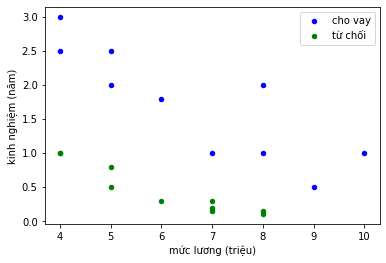

In [62]:
# scatter data
x_yes = x[y[:, 0]==1]
x_no = x[y[:, 0]==0]

plt.scatter(x_yes[:, 0], x_yes[:, 1], c='blue', s=20, label='cho vay')
plt.scatter(x_no[:, 0], x_no[:, 1], c='green', s=20, label='từ chối')
plt.legend()
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

In [74]:
model = LogisticRegression(eps=1e-1)
model.fit(x, y)

0.09999946407024021 56641


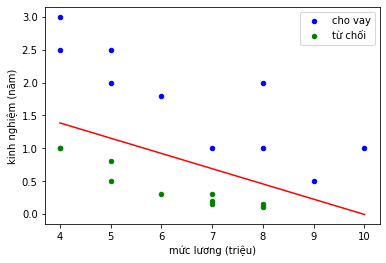

In [75]:
# scatter data
x_yes = x[y[:, 0]==1]
x_no = x[y[:, 0]==0]

plt.scatter(x_yes[:, 0], x_yes[:, 1], c='blue', s=20, label='cho vay')
plt.scatter(x_no[:, 0], x_no[:, 1], c='green', s=20, label='từ chối')
plt.legend()
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

# plt boundary with threshold = .5
t = 0.5
w = model.coef()
x_range = (x[:,0].min(), x[:,0].max())
y_range = (-(w[0] + x_range[0]*w[1]+ np.log(1/t-1))/w[2], -(w[0] + x_range[1]*w[1]+ np.log(1/t-1))/w[2])

plt.plot(x_range, y_range, 'red')